# Figures
Visualize the results of the analyses for the indices paper

In [1]:
import os
import pickle as pkl
import string
import sys
from glob import glob

import numpy as np
import pandas as pd
import svgutils.transform as sg
from plotnine import *
from svgutils.compose import SVG, Figure, Panel, Text

sys.path.append('../indices')
from utils import load_percentile_data, load_journal_data, load_single_heading, parse_metadata

In [2]:
headings = [('nanotechnology', 'microscopy'), ('immunochemistry', 'anatomy'), 
            ('proteomics', 'metabolomics'), ('computational_biology', 'human_genetics')]

In [3]:
for heading1, heading2 in headings:
    percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
    
    hist_data = percentile_data.melt(id_vars='doi', value_vars=[f'{heading1}_pagerank', f'{heading2}_pagerank'],
                                     value_name='PageRank',)
    
    h1 = string.capwords(heading1.replace('_', ' '))
    h2 = string.capwords(heading2.replace('_', ' '))
    
    new_names = {f'{heading1}_pagerank': f'{h1}',
                 f'{heading2}_pagerank': f'{h2}'}
    
    hist_data['Field'] = hist_data['variable'].map(new_names)
        
    plot = ggplot(hist_data, aes(x='PageRank', fill='Field'))
    plot += geom_histogram(position='identity', alpha=.7)
    plot += scale_x_log10()
    plot += scale_y_continuous(name='Count')
    plot += ggtitle(f'{h1} and {h2} Pagerank Distribution')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading1}-{heading2}-hist.svg')

    plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank',))
    plot += geom_bin2d()
    plot += scale_x_log10(name=f'{h1} Pagerank')
    plot += scale_y_log10(name=f'{h2} Pagerank')
    plot += ggtitle(f'{h1} vs {h2} Pageranks')
    plot += scale_fill_gradient(trans='log')
    plot += theme_classic()

    ggsave(plot, f'../figures/{heading1}-{heading2}-heatmap.svg')
    


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-microscopy-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 41'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-microscopy-heatmap.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/mizani/formatters.py:499: UserWarning: Formating values as base = 10
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: S

## Create annotated difference plots

In [4]:
heading1 = 'nanotechnology'
heading2 = 'microscopy'

h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

title1 = 'A robust DNA mechanical device controlled'
title2 = 'Bioadhesive poly'
title3 = 'DNA-templated self-assembly of protein arrays'
title4 = 'Photostable luminescent nanoparticles '
title5 = 'WSXM: a software for scanning'
title6 = 'Measuring distances in supported bilayers'
title7 = 'Toward fluorescence'
title8 = 'In vivo imaging of quantum dots encapsulated'
title9 = 'Water-soluble quantum dots'

percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data[f'{heading1}-{heading2}'] *= 100
percentile_data = percentile_data.rename({f'{heading1}-{heading2}': f'{h1}-{h2}'}, axis=1)
t1_row = percentile_data[percentile_data['title'].str.contains(title1)]
t2_row = percentile_data[percentile_data['title'].str.contains(title2)]
t3_row = percentile_data[percentile_data['title'].str.contains(title3)]
t4_row = percentile_data[percentile_data['title'].str.contains(title4)]
t5_row = percentile_data[percentile_data['title'].str.contains(title5)]
t6_row = percentile_data[percentile_data['title'].str.contains(title6)]
t7_row = percentile_data[percentile_data['title'].str.contains(title7)]
t8_row = percentile_data[percentile_data['title'].str.contains(title8)]
t9_row = percentile_data[percentile_data['title'].str.contains(title9)]

In [5]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
plot += annotate('text', label='172', 
                 x=t1_row[f'{heading1}_pagerank'], y=t1_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='173', 
                 x=t2_row[f'{heading1}_pagerank'], y=t2_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='174', 
                 x=t3_row[f'{heading1}_pagerank'], y=t3_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='175', 
                 x=t4_row[f'{heading1}_pagerank'], y=t4_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='176', 
                 x=t5_row[f'{heading1}_pagerank'], y=t5_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='177', 
                 x=t6_row[f'{heading1}_pagerank'], y=t6_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='178', 
                 x=t7_row[f'{heading1}_pagerank'], y=t7_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='179', 
                 x=t8_row[f'{heading1}_pagerank'], y=t8_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='180', 
                 x=t9_row[f'{heading1}_pagerank'], y=t9_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += theme_classic()
plot
ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-microscopy-difference.svg


In [6]:
heading1 = 'immunochemistry'
heading2 = 'anatomy'

h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

title1 = 'Immunoelectron microscopic exploration'
title2 = 'expression in cat posterior temporalis muscle during postnatal development'
title3 = 'Electron microscopic demonstration of calcitonin in human'
title4 = 'Grafting genetically modified cells into the rat brain:'
title5 = 'Vitamin-D-dependent calcium-binding-protein and parvalbumin'
title6 = 'Mapping of brain areas containing RNA homologous to cDNAs'
title7 = 'Studies of the HER-2/neu proto-oncogene'
title8 = 'Expression of c-fos protein in brain'
title9 = 'immunolocalization in paraffin sections:'

percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data[f'{heading1}-{heading2}'] *= 100
percentile_data = percentile_data.rename({f'{heading1}-{heading2}': f'{h1}-{h2}'}, axis=1)
t1_row = percentile_data[percentile_data['title'].str.contains(title1)]
t2_row = percentile_data[percentile_data['title'].str.contains(title2)]
t3_row = percentile_data[percentile_data['title'].str.contains(title3)]
t4_row = percentile_data[percentile_data['title'].str.contains(title4)]
t5_row = percentile_data[percentile_data['title'].str.contains(title5)]
t6_row = percentile_data[percentile_data['title'].str.contains(title6)]
t7_row = percentile_data[percentile_data['title'].str.contains(title7)]
t8_row = percentile_data[percentile_data['title'].str.contains(title8)]
t9_row = percentile_data[percentile_data['title'].str.contains(title9)]

In [7]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
plot += annotate('text', label='181', 
                 x=t1_row[f'{heading1}_pagerank'], y=t1_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='182', 
                 x=t2_row[f'{heading1}_pagerank'], y=t2_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='183', 
                 x=t3_row[f'{heading1}_pagerank'], y=t3_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='184', 
                 x=t4_row[f'{heading1}_pagerank'], y=t4_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='185', 
                 x=t5_row[f'{heading1}_pagerank'], y=t5_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='186', 
                 x=t6_row[f'{heading1}_pagerank'], y=t6_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='187', 
                 x=t7_row[f'{heading1}_pagerank'], y=t7_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='188', 
                 x=t8_row[f'{heading1}_pagerank'], y=t8_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='189', 
                 x=t9_row[f'{heading1}_pagerank'], y=t9_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += theme_classic()
ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/immunochemistry-anatomy-difference.svg


In [8]:
heading1 = 'proteomics'
heading2 = 'metabolomics'

h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

title1 = 'Proteomics Standards Initiative:'
title2 = 'Limited Environmental Serine and Glycine'
title3 = 'A high-throughput processing service for retention'
title4 = 'MeltDB: a software platform for the analysis'
title5 = 'In silico fragmentation for computer assisted identification'
title6 = 'The metabonomic signature of celiac'
title7 = 'Visualization of omics data for systems biology'
title8 = 'FunRich: An open access standalone functional'
title9 = 'Proteomic and Metabolomic Characterization of COVID-19 Patient Sera'

percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data[f'{heading1}-{heading2}'] *= 100
percentile_data = percentile_data.rename({f'{heading1}-{heading2}': f'{h1}-{h2}'}, axis=1)
t1_row = percentile_data[percentile_data['title'].str.contains(title1)]
t2_row = percentile_data[percentile_data['title'].str.contains(title2)]
t3_row = percentile_data[percentile_data['title'].str.contains(title3)]
t4_row = percentile_data[percentile_data['title'].str.contains(title4)]
t5_row = percentile_data[percentile_data['title'].str.contains(title5)]
t6_row = percentile_data[percentile_data['title'].str.contains(title6)]
t7_row = percentile_data[percentile_data['title'].str.contains(title7)]
t8_row = percentile_data[percentile_data['title'].str.contains(title8)]
t9_row = percentile_data[percentile_data['title'].str.contains(title9)]

In [9]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
plot += annotate('text', label='190', 
                 x=t1_row[f'{heading1}_pagerank'], y=t1_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='191', 
                 x=t2_row[f'{heading1}_pagerank'], y=t2_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='192', 
                 x=t3_row[f'{heading1}_pagerank'], y=t3_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='193', 
                 x=t4_row[f'{heading1}_pagerank'], y=t4_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='194', 
                 x=t5_row[f'{heading1}_pagerank'], y=t5_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='195', 
                 x=t6_row[f'{heading1}_pagerank'], y=t6_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='196', 
                 x=t7_row[f'{heading1}_pagerank'], y=t7_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='197', 
                 x=t8_row[f'{heading1}_pagerank'], y=t8_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='198', 
                 x=t9_row[f'{heading1}_pagerank'], y=t9_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += theme_classic()

ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/proteomics-metabolomics-difference.svg


In [10]:
heading1 = 'computational_biology'
heading2 = 'human_genetics'

h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

title1 = 'Development of human protein reference'
title2 = 'A database for post-genome analysis'
title3 = 'Use of mass spectrometry-derived data'
title4 = 'Genetic discrimination: perspectives'
title5 = 'Committee Opinion No. 690:'
title6 = 'Public health genomics: the end'
title7 = 'Initial sequencing and analysis of the human genome'
title8 = 'An STS-based map of the human genome'
title9 = 'A new five-year plan'

percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data[f'{heading1}-{heading2}'] *= 100
percentile_data = percentile_data.rename({f'{heading1}-{heading2}': f'{h1}-{h2}'}, axis=1)
t1_row = percentile_data[percentile_data['title'].str.contains(title1)]
t2_row = percentile_data[percentile_data['title'].str.contains(title2)]
t3_row = percentile_data[percentile_data['title'].str.contains(title3)]
t4_row = percentile_data[percentile_data['title'].str.contains(title4)]
t5_row = percentile_data[percentile_data['title'].str.contains(title5)]
t6_row = percentile_data[percentile_data['title'].str.contains(title6)]
t7_row = percentile_data[percentile_data['title'].str.contains(title7)]
t8_row = percentile_data[percentile_data['title'].str.contains(title8)]
t9_row = percentile_data[percentile_data['title'].str.contains(title9)]
print(t6_row)

                               doi  human_genetics_pagerank  \
1168  10.1097/gim.0b013e31821024ca                 0.000282   

      human_genetics_percentile  human_genetics_count  \
1168                        1.0                  59.0   

      computational_biology_pagerank  computational_biology_percentile  \
1168                        0.000002                              0.23   

      computational_biology_count  human_genetics-computational_biology  \
1168                          100                                  0.77   

      Computational Biology-Human Genetics      pmid pmcid    journal  \
1168                                 -77.0  21311338  None  Genet Med   

                                                  title  
1168  Public health genomics: the end of the beginning.  


In [11]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
plot += annotate('text', label='199', 
                 x=t1_row[f'{heading1}_pagerank'], y=t1_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='200', 
                 x=t2_row[f'{heading1}_pagerank'], y=t2_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='201', 
                 x=t3_row[f'{heading1}_pagerank'], y=t3_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='202', 
                 x=t4_row[f'{heading1}_pagerank'], y=t4_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='203', 
                 x=t5_row[f'{heading1}_pagerank'], y=t5_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='204', 
                 x=t6_row[f'{heading1}_pagerank'], y=t6_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='205', 
                 x=t7_row[f'{heading1}_pagerank'], y=t7_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='1', 
                 x=t8_row[f'{heading1}_pagerank'], y=t8_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='206', 
                 x=t9_row[f'{heading1}_pagerank'], y=t9_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += theme_classic()
ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/computational_biology-human_genetics-difference.svg


In [12]:
# Unannotated plot for slideshow
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')

plot += theme_classic()
ggsave(plot, f'../figures/{heading1}-{heading2}-difference-unannotated.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/computational_biology-human_genetics-difference-unannotated.svg


## Combine histograms

In [13]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-hist.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-hist.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-hist.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-hist.svg'

y_2 = 310
x_2 = 520

fig = Figure("1080", "636",
       Panel(
          SVG(plot1),
          Text("A", 0, 40, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 20, 40, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 0, 50, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 20, 50, size=30).move(x_2-20, y_2),
          )
       )
fig.save('../figures/combined_histogram.svg')

In [14]:
!inkscape --export-dpi 200 --export-png=../figures/combined_histogram.png ../figures/combined_histogram.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1080:636 exported to 2250 x 1325 pixels (200 dpi)
Bitmap saved as: ../figures/combined_histogram.png


## Combine heatmaps

In [15]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-heatmap.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-heatmap.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-heatmap.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-heatmap.svg'

y_2 = 325
x_2 = 500

fig = Figure("1007", "656",
       Panel(
          SVG(plot1),
          Text("A", 25, 20, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 20, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 25, 20, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 25, 20, size=30).move(x_2-20, y_2),
          )
       )
fig.save('../figures/combined_heatmap.svg')

In [16]:
!inkscape --export-dpi 200 --export-png=../figures/combined_heatmap.png ../figures/combined_heatmap.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1007:656 exported to 2098 x 1367 pixels (200 dpi)
Bitmap saved as: ../figures/combined_heatmap.png


## Combine percentile plots

In [17]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-difference.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-difference.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-difference.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-difference.svg'

y_2 = 325
x_2 = 630

fig = Figure("1300", "656",
       Panel(
          SVG(plot1),
          Text("A", 15, 30, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 30, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 15, 30, size=30).move(0, y_2-25),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 25, 30, size=30).move(x_2-20, y_2-25),
          )
       )
fig.save('../figures/combined_difference.svg')

In [18]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-difference.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-difference.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-difference.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-difference.svg'

y_2 = 325
x_2 = 580

fig = Figure("1300", "656",
       Panel(
          SVG(plot1),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          )
       )
fig.save('../figures/combined_difference_unlabeled.svg')

In [19]:
!inkscape --export-dpi 200 --export-png=../figures/combined_difference.png ../figures/combined_difference.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1300:656 exported to 2708 x 1367 pixels (200 dpi)
Bitmap saved as: ../figures/combined_difference.png


## Build journal plots

In [20]:
with open('../viz_dataframes/journals/nanotechnology-microscopy.pkl', 'rb') as in_file:
    nanotech_df = pkl.load(in_file)
nanotech_df.head()
science_row = nanotech_df[nanotech_df['journal_title'] == 'Science']
science_x_loc = science_row['nanotechnology_pagerank']
science_y_loc = science_row['microscopy_pagerank']

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/microscopy_journals.svg


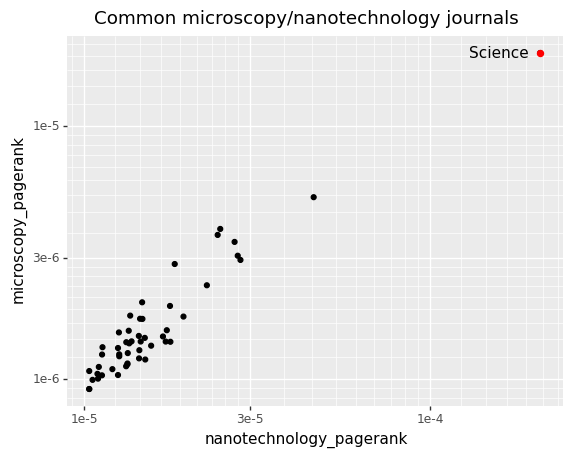

<ggplot: (8764380810484)>

In [21]:
plot = ggplot(nanotech_df, aes(x='nanotechnology_pagerank', y='microscopy_pagerank'))
plot += geom_point()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle('Common microscopy/nanotechnology journals')
plot += annotate('text', x=science_x_loc - 5e-5, y=science_y_loc, label='Science',)
plot += annotate('point', x=science_x_loc, y=science_y_loc, fill='red', size=2, color='red')
ggsave(plot, '../figures/microscopy_journals.svg')
plot

In [22]:
with open('../viz_dataframes/journals/immunochemistry-anatomy.pkl', 'rb') as in_file:
    immunochem_df = pkl.load(in_file)
immunochem_df.head()
science_row = immunochem_df[immunochem_df['journal_title'] == 'Science']
science_x_loc = science_row['immunochemistry_pagerank']
science_y_loc = science_row['anatomy_pagerank']

In [23]:
nature_row = immunochem_df[immunochem_df['journal_title'] == 'Nature']
nature_x_loc = nature_row['immunochemistry_pagerank']
nature_y_loc = nature_row['anatomy_pagerank']

In [24]:
cell_row = immunochem_df[immunochem_df['journal_title'] == 'Cell']
cell_x_loc = cell_row['immunochemistry_pagerank']
cell_y_loc = cell_row['anatomy_pagerank']

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/immunochemistry_journals.svg


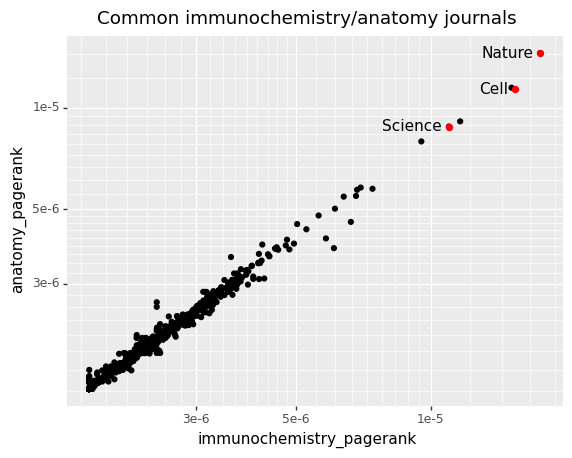

<ggplot: (8764396888644)>

In [25]:
plot = ggplot(immunochem_df, aes(x='immunochemistry_pagerank', y='anatomy_pagerank'))
plot += geom_point()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle('Common immunochemistry/anatomy journals')
plot += annotate('text', x=science_x_loc - 1.9e-6, y=science_y_loc, label='Science',)
plot += annotate('point', x=science_x_loc, y=science_y_loc, fill='red', size=2, color='red')
plot += annotate('text', x=nature_x_loc - 2.7e-6, y=nature_y_loc, label='Nature',)
plot += annotate('point', x=nature_x_loc, y=nature_y_loc, fill='red', size=2, color='red')
plot += annotate('text', x=cell_x_loc - 1.6e-6, y=cell_y_loc, label='Cell',)
plot += annotate('point', x=cell_x_loc, y=cell_y_loc, fill='red', size=2, color='red')
ggsave(plot, '../figures/immunochemistry_journals.svg')
plot

## Combine journal plots

In [26]:
plot1 = f'../figures/microscopy_journals.svg'
plot2 = f'../figures/immunochemistry_journals.svg'

y_2 = 325
x_2 = 415

fig = Figure("828", "331",
       Panel(
          SVG(plot1),
          Text("A", 25, 20, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 20, size=30).move(x_2-20, 0),
          ),
       )
fig.save('../figures/combined_journals.svg')

In [27]:
!inkscape --export-dpi 200 --export-png=../figures/combined_journals.png ../figures/combined_journals.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:828:331 exported to 1725 x 690 pixels (200 dpi)
Bitmap saved as: ../figures/combined_journals.png


## Create per-field distribution plots

In [28]:
for heading1, heading2 in headings:
    with open(f'../output/{heading1}-{heading2}-pagerank.pkl', 'rb') as in_file:
        h1_dict = pkl.load(in_file)
        h1_df = pd.DataFrame.from_dict(h1_dict, orient='index', columns=['pagerank'])
    with open(f'../output/{heading2}-{heading1}-pagerank.pkl', 'rb') as in_file:
        h2_dict = pkl.load(in_file)
        h2_df = pd.DataFrame.from_dict(h2_dict, orient='index', columns=['pagerank'])
    
    h1_text = string.capwords(heading1.replace('_', ' '))
    h2_text = string.capwords(heading2.replace('_', ' '))
    
    plot = ggplot(h1_df, aes(x='pagerank'))
    plot += geom_histogram()
    plot += ggtitle(f'{h1_text} PageRank Distribution')
    plot += scale_x_log10(name='PageRank')
    plot += scale_y_continuous(name='Count')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading1}-hist.svg')
    
    plot = ggplot(h2_df, aes(x='pagerank'))
    plot += geom_histogram()
    plot += ggtitle(f'{h2_text} PageRank Distribution')
    plot += scale_x_log10(name='PageRank')
    plot += scale_y_continuous(name='Count')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading2}-hist.svg')
    

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 140'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/microscopy-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 322'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718:

In [29]:
plot1 = f'../figures/{headings[0][0]}-hist.svg'
plot5 = f'../figures/{headings[0][1]}-hist.svg'
plot2 = f'../figures/{headings[1][0]}-hist.svg'
plot6 = f'../figures/{headings[1][1]}-hist.svg'
plot3 = f'../figures/{headings[2][0]}-hist.svg'
plot7 = f'../figures/{headings[2][1]}-hist.svg'
plot4 = f'../figures/{headings[3][0]}-hist.svg'
plot8 = f'../figures/{headings[3][1]}-hist.svg'

y_2 = 325
x_2 = 420
x_3 = 840
x_4 = 1260

fig = Figure("1693", "654",
       Panel(
          SVG(plot1),
          Text("A", 0, 30, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 20, 30, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(x_3, 0),
          Text("C", 0, 30, size=30).move(x_3, 0)
          ),
       Panel(
          SVG(plot4).move(x_4, 0),
          Text("D", 20, 30, size=30).move(x_4, 0),
          ),
       Panel(
          SVG(plot5).move(0, y_2),
          Text("E", 0, 30, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot6).move(x_2, y_2),
          Text("F", 20, 30, size=30).move(x_2-20, y_2),
          ),
       Panel(
          SVG(plot7).move(x_3, y_2),
          Text("G", 0, 30, size=30).move(x_3, y_2),
          ),
       Panel(
          SVG(plot8).move(x_4, y_2),
          Text("H", 20, 30, size=30).move(x_4, y_2),
          ),
     )

fig.save('../figures/per-field.svg')

In [30]:
!inkscape  --export-dpi 200 --export-png=../figures/per-field.png ../figures/per-field.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1693:654 exported to 3527 x 1363 pixels (200 dpi)
Bitmap saved as: ../figures/per-field.png


## Top journal analysis

In [31]:
output_files = glob('../output/*-*-pagerank.pkl')
print(len(output_files))

1980


In [32]:
top_journal_info = {'top_journal': [], 'field': []}
headings_seen = set()

for file in output_files:
    heading = os.path.basename(file).split('-')[0]
    if heading in headings_seen:
        continue
    else:
        headings_seen.add(heading)
    
    with open(file, 'rb') as in_file:
        heading_dict = pkl.load(in_file)
    pagerank_df = pd.DataFrame.from_dict(heading_dict, orient='index', columns=['pagerank'])
    pagerank_df = pagerank_df.reset_index()
    pagerank_df = pagerank_df.rename({'index': 'doi'}, axis='columns')
    
    metadata_path = f'../data/pubmed/efetch/{heading}.xml.xz'
    metadata = parse_metadata(metadata_path)
    
    doi_to_journal = dict(zip(metadata['doi'], metadata['journal']))
    
    pagerank_df['journal'] = pagerank_df['doi'].map(doi_to_journal)
        
    journal_series = pagerank_df.groupby('journal').count() > 50 
    common_journals = set(journal_series[journal_series['doi']].index)
    
    common_journal_df = pagerank_df[pagerank_df['journal'].isin(common_journals)]
    top_journals = common_journal_df.groupby('journal').median().sort_values(by='pagerank', ascending=False)
        
    top_journal = top_journals.index[0]
    
    top_journal_info['top_journal'].append(top_journal)
    top_journal_info['field'].append(heading)

In [33]:
top_journal_df = pd.DataFrame(top_journal_info)
top_journal_list = top_journal_df['top_journal'].value_counts().index.tolist()
tj_categorical = pd.Categorical(top_journal_df['top_journal'], categories=top_journal_list)
top_journal_df['cat'] = tj_categorical

top_journal_df

,top_journal,field,cat
0,Cell,histocytochemistry,Cell
1,Ann Fam Med,empirical_research,Ann Fam Med
2,Nat Neurosci,neurosciences,Nat Neurosci
3,Nat Rev Drug Discov,pharmacology,Nat Rev Drug Discov
4,Sci Transl Med,translational_research_biomedical,Sci Transl Med
5,Science,rheology,Science
6,Cell,immunochemistry,Cell
7,Int J Syst Bacteriol,soil_microbiology,Int J Syst Bacteriol
8,Mutat Res,toxicology,Mutat Res
9,Science,magnetics,Science


In [34]:
plot = ggplot(top_journal_df, aes(x='cat'))
plot += geom_bar(stat='count')
plot += theme_classic()
plot += theme(axis_text_x=element_text(rotation=90, hjust=.5))
plot += ylab('Field Count')
plot += xlab('Journal')
plot += scale_y_continuous(breaks=list(range(0,10, 2)))
plot += ggtitle('Top Journal Frequency')

ggsave(plot, '../figures/journal_hist.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/journal_hist.svg


In [35]:
!inkscape  --export-dpi 200 --export-png=../figures/journal_hist.png ../figures/journal_hist.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:529.487:570.723 exported to 1103 x 1189 pixels (200 dpi)
Bitmap saved as: ../figures/journal_hist.png


## Journal field distribution

In [36]:
journal_info = {'journal': [], 'count': [], 'field': []}
headings_seen = set()

for file in output_files:
    heading = os.path.basename(file).split('-')[0]
    if heading in headings_seen:
        continue
    else:
        headings_seen.add(heading)
    
    with open(file, 'rb') as in_file:
        heading_dict = pkl.load(in_file)
    pagerank_df = pd.DataFrame.from_dict(heading_dict, orient='index', columns=['pagerank'])
    pagerank_df = pagerank_df.reset_index()
    pagerank_df = pagerank_df.rename({'index': 'doi'}, axis='columns')
    
    
    metadata_path = f'../data/pubmed/efetch/{heading}.xml.xz'
    metadata = parse_metadata(metadata_path)
    
    doi_to_journal = dict(zip(metadata['doi'], metadata['journal']))
    
    pagerank_df['journal'] = pagerank_df['doi'].map(doi_to_journal)
    for journal, count in pagerank_df['journal'].value_counts().iteritems():
        journal_info['journal'].append(journal)
        journal_info['count'].append(count)
        journal_info['field'].append(heading)

In [37]:
journal_df = pd.DataFrame(journal_info)
journal_df

,journal,count,field
0,Brain Res,6342,histocytochemistry
1,Neuroscience,4569,histocytochemistry
2,PLoS One,4510,histocytochemistry
3,J Comp Neurol,4496,histocytochemistry
4,J Histochem Cytochem,4428,histocytochemistry
...,...,...,...
89853,J Immunotoxicol,1,crystallography
89854,Pathol Biol (Paris),1,crystallography
89855,Cancer Sci,1,crystallography
89856,Biogr Mem Fellows R Soc,1,crystallography


In [38]:
journal_df['field'].nunique()

45

In [39]:
# There are 5178 journals with at least 100 articles in the dataset
(journal_df.groupby('journal').sum() > 50 ).sum()

count    5178
dtype: int64

In [40]:
journal_series = journal_df.groupby('journal').sum() > 50 
common_journals = set(journal_series[journal_series['count']].index)

In [41]:
common_journal_df = journal_df.loc[journal_df['journal'].isin(common_journals)]
common_journal_df

,journal,count,field
0,Brain Res,6342,histocytochemistry
1,Neuroscience,4569,histocytochemistry
2,PLoS One,4510,histocytochemistry
3,J Comp Neurol,4496,histocytochemistry
4,J Histochem Cytochem,4428,histocytochemistry
...,...,...,...
89852,J Tongji Med Univ,1,crystallography
89853,J Immunotoxicol,1,crystallography
89854,Pathol Biol (Paris),1,crystallography
89855,Cancer Sci,1,crystallography


In [42]:
common_journal_df

,journal,count,field
0,Brain Res,6342,histocytochemistry
1,Neuroscience,4569,histocytochemistry
2,PLoS One,4510,histocytochemistry
3,J Comp Neurol,4496,histocytochemistry
4,J Histochem Cytochem,4428,histocytochemistry
...,...,...,...
89852,J Tongji Med Univ,1,crystallography
89853,J Immunotoxicol,1,crystallography
89854,Pathol Biol (Paris),1,crystallography
89855,Cancer Sci,1,crystallography


In [43]:
common_journal_df.groupby('journal').count().median()

count    15.0
field    15.0
dtype: float64

In [44]:
plot = ggplot(common_journal_df.groupby('journal').count(), aes(x='field'))
plot += geom_histogram(bins=43)
plot += xlab('Number of Fields')
plot += ylab('Number of Journals')
plot += ggtitle('Number of Publication Fields per Journal')
plot += theme_classic()
plot
ggsave(plot, '../figures/fields_per_journal.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/fields_per_journal.svg


In [45]:
!inkscape  --export-dpi 200 --export-png=../figures/fields_per_journal.png ../figures/fields_per_journal.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:544.417:437.24 exported to 1134 x 911 pixels (200 dpi)
Bitmap saved as: ../figures/fields_per_journal.png


## Journal rank comparison plot

In [46]:
journal_rank_info = {'journal': [], 'field': [], 'rank': []}
headings_seen = set()

for file in output_files:
    heading = os.path.basename(file).split('-')[0]
    if heading in headings_seen:
        continue
    else:
        headings_seen.add(heading)
    
    with open(file, 'rb') as in_file:
        heading_dict = pkl.load(in_file)
    pagerank_df = pd.DataFrame.from_dict(heading_dict, orient='index', columns=['pagerank'])
    pagerank_df = pagerank_df.reset_index()
    pagerank_df = pagerank_df.rename({'index': 'doi'}, axis='columns')
    
    metadata_path = f'../data/pubmed/efetch/{heading}.xml.xz'
    metadata = parse_metadata(metadata_path)
    
    doi_to_journal = dict(zip(metadata['doi'], metadata['journal']))
    
    pagerank_df['journal'] = pagerank_df['doi'].map(doi_to_journal)
        
    journal_series = pagerank_df.groupby('journal').count() > 50 
    common_journals = set(journal_series[journal_series['doi']].index)
    
    common_journal_df = pagerank_df[pagerank_df['journal'].isin(common_journals)]
    
    journal_ranks = common_journal_df.groupby('journal').median().sort_values(by='pagerank', ascending=False)
    
    for i, (journal, pagerank) in enumerate(zip(journal_ranks.index, journal_ranks.pagerank)):
        journal_rank_info['journal'].append(journal)
        journal_rank_info['field'].append(heading)
        journal_rank_info['rank'].append(i+1)

In [47]:
top_df = pd.DataFrame(journal_rank_info)
top_df

,journal,field,rank
0,Cell,histocytochemistry,1
1,Nat Genet,histocytochemistry,2
2,Science,histocytochemistry,3
3,Cancer Cell,histocytochemistry,4
4,Neuron,histocytochemistry,5
...,...,...,...
14872,Molecules,crystallography,247
14873,Environ Sci Pollut Res Int,crystallography,248
14874,Environ Technol,crystallography,249
14875,Microsc Res Tech,crystallography,250


In [48]:
heading1 = 'nanotechnology'
heading2 = 'microscopy'
h1_condition = (top_df['rank'] < 51) & (top_df['field'] == f'{heading1}')
top_fifty_heading1 = top_df[h1_condition]
h2_ranks = top_df[top_df['field'] == 'microscopy']

journal_to_rank = dict(zip(h2_ranks['journal'], h2_ranks['rank']))

top_fifty_heading1[f'{heading2}_rank'] = top_fifty_heading1['journal'].map(journal_to_rank)
top_fifty_heading1

/tmp/ipykernel_14056/1556802719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,journal,field,rank,microscopy_rank
8478,Science,nanotechnology,1,6.0
8479,Nat Mater,nanotechnology,2,5.0
8480,Nature,nanotechnology,3,19.0
8481,Chem Rev,nanotechnology,4,35.0
8482,Nat Nanotechnol,nanotechnology,5,23.0
8483,Nat Methods,nanotechnology,6,21.0
8484,Acc Chem Res,nanotechnology,7,36.0
8485,J Am Chem Soc,nanotechnology,8,53.0
8486,Proc Natl Acad Sci U S A,nanotechnology,9,63.0
8487,Chem Soc Rev,nanotechnology,10,27.0


In [49]:
top_fifty_heading1['rank'].corr(top_fifty_heading1['microscopy_rank'])

0.7455024264294051

In [50]:
h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

plot = ggplot(top_fifty_heading1, aes(x='rank', y=f'{heading2}_rank'))
plot += geom_point()
plot += xlab(f"{h1} Rank")
plot += ylab(f"{h2} Rank")
plot += geom_abline(intercept=0, slope=1, linetype='--')
plot += theme_classic()
plot += ggtitle(f'{h1} and {h2} Journal Rank Comparison')
#plot
ggsave(plot, f'../figures/{heading1}-{heading2}-rank_comparison.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-microscopy-rank_comparison.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


## Inter-field correlation plots

In [51]:
correlation_data = {'field-pair': [], 'correlation': []}
pairs_seen = set()
pair_files = glob('../viz_dataframes/percentiles/*-*.pkl')
for file in pair_files:
    base = os.path.splitext(os.path.basename(file))[0]
    heading1, heading2 = base.split('-')
    percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
    
    if (heading2, heading1) in pairs_seen:
        continue
    else:
        pairs_seen.add((heading1, heading2))
        
    
    h1 = string.capwords(heading1.replace('_', ' '))
    h2 = string.capwords(heading2.replace('_', ' '))
    
    corr = percentile_data[f'{heading1}_pagerank'].corr(percentile_data[f'{heading2}_pagerank'])

    correlation_data['correlation'].append(corr)
    correlation_data['field-pair'].append(f'{heading1}/{heading2}')

In [52]:
corr_df = pd.DataFrame(correlation_data)
corr_df = corr_df.sort_values(by='correlation', ascending=False)
corr_df['corr_rank'] = range(1, len(corr_df)+1)
corr_df

,field-pair,correlation,corr_rank
0,rheology/microtechnology,0.977013,1
41,immunochemistry/anatomy,0.965891,2
68,physiology/biophysics,0.960879,3
51,anatomy/histocytochemistry,0.956195,4
104,statistics_as_topic/outcome_assessment_health_...,0.939284,5
...,...,...,...
65,pharmacology/research_design,0.233240,104
46,physiology/microscopy,0.207133,105
43,crystallography/computational_biology,0.195163,106
63,computational_biology/biotechnology,0.190090,107


In [53]:
selected_pairs = {f'{heading1}/{heading2}' for heading1, heading2 in headings}
selected_pairs.add('human_genetics/computational_biology')
selected_pairs.add('metabolomics/proteomics')

highlight_df = corr_df[corr_df['field-pair'].isin(selected_pairs)]
highlight_df

,field-pair,correlation,corr_rank
41,immunochemistry/anatomy,0.965891,2
7,human_genetics/computational_biology,0.789193,19
98,nanotechnology/microscopy,0.707231,28
103,metabolomics/proteomics,0.238353,103


In [54]:
immuno_x = highlight_df[highlight_df['field-pair'] == 'immunochemistry/anatomy'].corr_rank
immuno_y = highlight_df[highlight_df['field-pair'] == 'immunochemistry/anatomy'].correlation
gen_x = highlight_df[highlight_df['field-pair'] == 'human_genetics/computational_biology'].corr_rank
gen_y = highlight_df[highlight_df['field-pair'] == 'human_genetics/computational_biology'].correlation
nano_x = highlight_df[highlight_df['field-pair'] == 'nanotechnology/microscopy'].corr_rank
nano_y = highlight_df[highlight_df['field-pair'] == 'nanotechnology/microscopy'].correlation
met_x = highlight_df[highlight_df['field-pair'] == 'metabolomics/proteomics'].corr_rank
met_y = highlight_df[highlight_df['field-pair'] == 'metabolomics/proteomics'].correlation

In [55]:
plot = ggplot(corr_df, aes(x='corr_rank', y='correlation'))
plot += geom_point()
plot += geom_point(highlight_df, fill='red', color='red')
plot += annotate('text', label='Immunochemistry/Anatomy', x=immuno_x, y=immuno_y, ha='left', va='bottom')
plot += annotate('text', label='Computational Biology/Genetics', x=gen_x, y=gen_y, ha='left', va='bottom')
plot += annotate('text', label='Nanotechnology/Microscopy', x=nano_x, y=nano_y, ha='left', va='bottom')
plot += annotate('text', label='Proteomics/Metabolomics', x=met_x, y=met_y, ha='right', va='top')
plot += ylab('Correlation')
plot += xlab('Correlation Rank')
plot += theme_classic()
plot += ggtitle('Field-Pair PageRank Correlations')

ggsave(plot, '../figures/correlations.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/correlations.svg


## Distribution overlap plots

In [56]:
for heading1, heading2 in headings:
    percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
    
    hist_data = percentile_data.melt(id_vars='doi', value_vars=[f'{heading1}_pagerank', f'{heading2}_pagerank'],
                                     value_name='PageRank',)
    
    h1 = string.capwords(heading1.replace('_', ' '))
    h2 = string.capwords(heading2.replace('_', ' '))
    
    new_names = {f'{heading1}_pagerank': f'{h1}',
                 f'{heading2}_pagerank': f'{h2}'}
    
    
    hist_data['Field'] = hist_data['variable'].map(new_names)
    
    overlapping_dois = list(hist_data['doi'])
    
    
    with open(f'../output/{heading1}-{heading2}-pagerank.pkl', 'rb') as in_file:
        h1_dict = pkl.load(in_file)
        h1_df = pd.DataFrame.from_dict(h1_dict, orient='index', columns=['pagerank'])
        h1_df['Shared Paper'] = f'All\n{h1}'
        h1_df.loc[overlapping_dois, 'Shared Paper'] = f'{h1}\nOverlapping'
    with open(f'../output/{heading2}-{heading1}-pagerank.pkl', 'rb') as in_file:
        h2_dict = pkl.load(in_file)
        h2_df = pd.DataFrame.from_dict(h2_dict, orient='index', columns=['pagerank'])
        h2_df['Shared Paper'] = f'All\n{h2}'
        h2_df.loc[overlapping_dois, 'Shared Paper'] = f'{h2}\nOverlapping'
    
    h1_text = string.capwords(heading1.replace('_', ' '))
    h2_text = string.capwords(heading2.replace('_', ' '))
    
    combined_df = pd.concat([h1_df, h2_df])
    
    cat_list = [f'All\n{h1}', f'{h1}\nOverlapping',
                f'{h2}\nOverlapping', f'All\n{h2}',]
    combined_df['categorical'] = pd.Categorical(combined_df['Shared Paper'], categories=cat_list)
    
    plot = ggplot(combined_df, aes(x='categorical', y='pagerank',))
    plot += geom_violin(fill='grey')
    plot += ggtitle(f'{h1_text} and {h2_text} PageRank Distributions')
    plot += scale_y_log10()
    plot += xlab('')
    plot += ylab('PageRank')
    plot += theme_classic()
    plot += theme(axis_text_x=element_text(rotation=90, hjust=.5))
    
    ggsave(plot, f'../figures/{heading1}-{heading2}-shared-hist.svg')


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-microscopy-shared-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/immunochemistry-anatomy-shared-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/proteomics-metabolomics-shared-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving

## Empirical CDF plots

In [57]:
for heading1, heading2 in headings:
    percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
    
    hist_data = percentile_data.melt(id_vars='doi', value_vars=[f'{heading1}_pagerank', f'{heading2}_pagerank'],
                                     value_name='PageRank',)
    
    h1 = string.capwords(heading1.replace('_', ' '))
    h2 = string.capwords(heading2.replace('_', ' '))
    
    new_names = {f'{heading1}_pagerank': f'{h1}',
                 f'{heading2}_pagerank': f'{h2}'}
    
    
    hist_data['Field'] = hist_data['variable'].map(new_names)
    
    hist_data = hist_data.sort_values(by='PageRank', ascending=True)
    hist_data['Fraction of Values'] = np.arange(1,(len(hist_data) + 1)) / len(hist_data)
    
    overlapping_dois = list(hist_data['doi'])
    
    with open(f'../output/{heading1}-{heading2}-pagerank.pkl', 'rb') as in_file:
        h1_dict = pkl.load(in_file)
    h1_df = pd.DataFrame.from_dict(h1_dict, orient='index', columns=['pagerank'])
    h1_df['Shared Paper'] = False
    h1_df.loc[overlapping_dois, 'Shared Paper'] = True
    h1_df = h1_df.sort_values(by='pagerank')
    h1_df['Fraction of Values'] = np.arange(1,(len(h1_df) + 1)) / len(h1_df)
    
    with open(f'../output/{heading2}-{heading1}-pagerank.pkl', 'rb') as in_file:
        h2_dict = pkl.load(in_file)
    h2_df = pd.DataFrame.from_dict(h2_dict, orient='index', columns=['pagerank'])
    h2_df['Shared Paper'] = False
    h2_df.loc[overlapping_dois, 'Shared Paper'] = True
    h2_df = h2_df.sort_values(by='pagerank')
    h2_df['Fraction of Values'] = np.arange(1,(len(h2_df) + 1)) / len(h2_df)
    
    h1_text = string.capwords(heading1.replace('_', ' '))
    h2_text = string.capwords(heading2.replace('_', ' '))
    
    h1_overlap = h1_df[h1_df['Shared Paper'] == True]
    h1_overlap = h1_overlap.sort_values(by='pagerank')
    h1_overlap['Fraction of Values'] = np.arange(1,(len(h1_overlap) + 1)) / len(h1_overlap)
    
    h2_overlap = h2_df[h2_df['Shared Paper'] == True]
    h2_overlap = h2_overlap.sort_values(by='pagerank')
    h2_overlap['Fraction of Values'] = np.arange(1,(len(h2_overlap) + 1)) / len(h2_overlap)
    
    h1_df['Papers Included'] = 'All'
    h1_overlap['Papers Included'] = 'Overlapping'
    h2_df['Papers Included'] = 'All'
    h2_overlap['Papers Included'] = 'Overlapping'
    
    h1_concat = pd.concat([h1_df, h1_overlap])
    h2_concat = pd.concat([h2_df, h2_overlap])
    
    plot = ggplot(h1_concat, aes(x='pagerank', y='Fraction of Values', color='Papers Included'))
    plot += geom_point()
    plot += ggtitle(f'{h1_text} Empirical CDFs')
    plot += scale_x_log10()
    plot += scale_color_manual(['black', 'red'])
    plot += xlab('PageRank')
    plot += theme_classic()
    
    ggsave(plot, f'../figures/{heading1}-ecdf.svg')
    
    plot = ggplot(h2_concat, aes(x='pagerank', y='Fraction of Values', color='Papers Included'))
    plot += geom_point()
    plot += ggtitle(f'{h2_text} Empirical CDFs')
    plot += scale_x_log10()
    plot += scale_color_manual(['black', 'red'])
    plot += xlab('PageRank')
    plot += theme_classic()
    
    ggsave(plot, f'../figures/{heading2}-ecdf.svg')

    

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-ecdf.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/microscopy-ecdf.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/immunochemistry-ecdf.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indice

## Fig. 3 Schematic Plot

In [58]:
heading_str = 'computational_biology-human_genetics'

heading_shuffled = glob(f'../output/shuffle_results/{heading_str}*-pagerank.pkl')

doi_to_shuffled_metrics = {}

for path in heading_shuffled:
    with open(path, 'rb') as in_file:
        result = pkl.load(in_file)
        for doi, value in result.items():
            if doi in doi_to_shuffled_metrics:
                doi_to_shuffled_metrics[doi].append(value)
            else:
                doi_to_shuffled_metrics[doi] = [value]
for doi, vals in doi_to_shuffled_metrics.items():
    doi_to_shuffled_metrics[doi] = sorted(vals)

with open(f'../output/{heading_str}-pagerank.pkl', 'rb') as in_file:
    true_vals = pkl.load(in_file)

In [59]:
# Public health genomics: The end of the beginning
doi = '10.1097/gim.0b013e31821024ca'

hist_df = pd.DataFrame()
hist_df['PageRank'] = doi_to_shuffled_metrics[doi]

true_pr = true_vals[doi]

plot = ggplot(hist_df, aes(x='PageRank'))
plot += geom_histogram()
plot += scale_x_log10()
plot += xlab('')
plot += ylab('')
plot += geom_vline(xintercept=true_pr, color='red', linetype='-', size=2)
plot += annotate('text', x=true_pr, y=25, label=' Percentile: 23', ha='left', size=24)
plot += theme_classic()

ggsave(plot, '../figures/23_percent.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/23_percent.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


In [60]:
# A database for post-genome analysis
doi = '10.1016/s0168-9525(97)01223-7'

hist_df = pd.DataFrame()
hist_df['PageRank'] = doi_to_shuffled_metrics[doi]

true_pr = true_vals[doi]

plot = ggplot(hist_df, aes(x='PageRank'))
plot += geom_histogram()
plot += scale_x_log10()
plot += xlab('')
plot += ylab('')
plot += geom_vline(xintercept=true_pr, color='red', linetype='-', size=2)
plot += annotate('text', x=true_pr, y=25, label='Percentile: 100', ha='right', size=24)
plot += theme_classic()

ggsave(plot, '../figures/100_percent.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/100_percent.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


## Assemble Figure 1

In [61]:
plot1 = f'../figures/fig_1_schematic.svg'
plot2 = f'../figures/nanotechnology-microscopy-rank_comparison.svg'
plot3 = f'../figures/journal_hist.svg'
plot4 = f'../figures/fields_per_journal.svg'


y_2 = 280
x_2 = 410
y_3 = 610

fig = Figure("810", "935",
       Panel(
          SVG(plot1),
          Text("A", 0, 30, size=30),
          ),
       Panel(
          SVG(plot2).move(0, y_2),
          Text("B", 0, 20, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot3).move(x_2, y_2),
          Text("C", 20, 20, size=30).move(x_2-20, y_2),
          ),
       Panel(
          SVG(plot4).move(0, y_3),
          Text("D", 0, 20, size=30).move(0, y_3),
          )
       )
fig.save('../figures/journal_fig.svg')

In [62]:
!inkscape --export-dpi 200 --export-png=../figures/journal_fig.png ../figures/journal_fig.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:810:935 exported to 1688 x 1948 pixels (200 dpi)
Bitmap saved as: ../figures/journal_fig.png


## Assemble Figure 2

In [63]:
plot1 = '../figures/fig_2_schematic.svg'
plot2 = '../figures/nanotechnology-microscopy-shared-hist.svg'
plot3 = '../figures/nanotechnology-ecdf.svg'
plot4 = '../figures/microscopy-ecdf.svg'
plot5 = '../figures/nanotechnology-microscopy-hist.svg'
plot6 = '../figures/nanotechnology-microscopy-heatmap.svg'

x_2 = 540
y_2 = 380
y_alt = 460
y_alt_2 = 790
y_3 = 710

fig = Figure("1080", "1040",
       Panel(
          SVG(plot1),
          Text("A", 10, 30, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 20, 30, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(x_2, y_2),
          Text("D", 10, 20, size=30).move(x_2, y_2),
          ),
       Panel(
          SVG(plot4).move(x_2, y_3),
          ),
       Panel(
          SVG(plot5).move(0, y_alt),
          Text("C", 10, 20, size=30).move(0, y_alt),
          ),
)
fig.save('../figures/distribution_fig.svg')

In [ ]:
!inkscape --export-dpi 200 --export-png=../figures/distribution_fig.png ../figures/distribution_fig.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1080:1040 exported to 2250 x 2167 pixels (200 dpi)


## Assemble Figure 3

In [ ]:
plot1 = f'../figures/fig_3_schematic.svg'
plot2 = f'../figures/correlations.svg'
plot3 = f'../figures/combined_difference_unlabeled.svg'
plot4 = f'../figures/webserver_screenshot.svg'

y_2 = 800
x_2 = 780
y_alt = 330

fig = Figure("1249", "1454",
       Panel(
          SVG(plot1),
          Text("A", 0, 30, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 20, 30, size=30).move(x_2-40, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 0, 20, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot4).scale(1.5).move(x_2, y_alt),
          Text("D", 20, 20, size=30).move(x_2-40, y_alt),
          )
       )
fig.save('../figures/percentile_figure.svg')

In [ ]:
!inkscape --export-dpi 200 --export-png=../figures/percentile_figure.png ../figures/percentile_figure.svg -b "#ffffffff"